## PYTHON NOTES & PERSONAL LEARNINGS

References:

1. https://data-flair.training/blogs/python-programming-interview-questions/

In [3]:
'''Decorator allows a user to add new functionality to an existing object without modifying its structure.
Decorators are usually called before the definition of a function you want to decorate.'''

'''Efficient way to count function calls'''

'''Decorator function'''

def call_counter(func):
    def helper(*args, **kwargs):
        helper.calls += 1
        return func(*args, **kwargs)
    helper.calls = 0
    helper.__name__= func.__name__
    return helper

In [4]:
'''Example of decorating function f with call_counter'''
@call_counter
def f(arg1):
    print(arg1)

In [5]:
'''Example output'''
print(f.calls)
list_input = ['a','b','c','d','e']
for i in list_input:
    f(i)   
print(f.calls)

0
a
b
c
d
e
5


ravel vs flatten:

Ravel is faster than flattening but updates directly to the original array because its a reference.

numpy concatenate:

Concatenate array of lists of different length into a single array along the same length axis. 

Remember the first argument in concatenate is sequences of array: (array1, array2) or [array1, array2] 

axis =0, row stacking and axis=1, column stacking2

In [79]:
'''numpy concatenate example'''
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7,8,9]])
x = np.concatenate((a,b), axis=0)
print('Concatenate 2 np arrays to a single numpy array:', x)

x_list = list()
x_list.append(a)
x_list.append(b)
x_list = np.array(x_list)
print('List of arrays:', x_list)

x_new = np.concatenate(x_list, axis=0)
print('Concatenate a list of arrays with different row counts to a single array', x_new)

x_ = np.concatenate(x_list[0], axis=0)
print('Concatenating a single array {} along rows:{}'.format(x_list[0], x_)) 
# Results in a lesser dim, because [0] provides an 1D array

Concatenate 2 np arrays to a single numpy array: [[1 2 3]
 [4 5 6]
 [7 8 9]]
List of arrays: [array([[1, 2, 3],
       [4, 5, 6]]) array([[7, 8, 9]])]
Concatenate a list of arrays with different row counts to a single array [[1 2 3]
 [4 5 6]
 [7 8 9]]
Concatenating a single array [[1 2 3]
 [4 5 6]] along rows:[1 2 3 4 5 6]


In [10]:
'''Lambda - Anonymous functions'''

# lambda arguments : expression

def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))


g = lambda x: x*x*x 
print(g(7)) # Just an expression return and not a function call.

22
33


In [20]:
'''map, filter, reduce'''

inp_list = [1, 2, 3, 4, 5]
out_list_map = list(map(lambda x: x**2, inp_list))
print(out_list_map)

out_list_filter = list(filter(lambda x: x<3, inp_list))
print(out_list_filter)

from functools import reduce
out_list_reduce = reduce((lambda x, y: x+y), inp_list)
print(out_list_reduce)

[1, 4, 9, 16, 25]
[1, 2]
15


In [9]:
'''Transpose a list'''
l = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print('l:', l)
print('zip(l):')
for i in zip(l):
    print(i)
print('zip(*l)')
for i in zip(*l):
    print(i)
transposed_l = list(map(list, zip(*l)))
print("Transposed 2D list",transposed_l)
print('\n')
l_3D = [[[1, 2, 3], [4, 5, 6], [7, 8, 9]]]
print('l:', l_3D)
print('zip(l):')
for i in zip(l_3D):
    print(i)
print('zip(*l)')
for i in zip(*l_3D):
    print(i)
transposed_l = list(map(list, zip(*l_3D)))
print("Transposed 3D list",transposed_l)

l: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
zip(l):
([1, 2, 3],)
([4, 5, 6],)
([7, 8, 9],)
zip(*l)
(1, 4, 7)
(2, 5, 8)
(3, 6, 9)
Transposed 2D list [[1, 4, 7], [2, 5, 8], [3, 6, 9]]


l: [[[1, 2, 3], [4, 5, 6], [7, 8, 9]]]
zip(l):
([[1, 2, 3], [4, 5, 6], [7, 8, 9]],)
zip(*l)
([1, 2, 3],)
([4, 5, 6],)
([7, 8, 9],)
Transposed 3D list [[[1, 2, 3]], [[4, 5, 6]], [[7, 8, 9]]]


In [14]:
dict_ = {1:'Deepan', 2: 'Deepan007', 3:'DeepanChakravarthi'}
list_of_dict_ = list()
for key,item in dict_.items():
    temp = [key,item]
    list_of_dict_.append(temp)
print('List in hand:',list_of_dict_)
list_of_dict_.sort(key = lambda x: x[0], reverse=True)
print('List in hand sorted:',list_of_dict_)

List in hand: [[1, 'Deepan'], [2, 'Deepan007'], [3, 'DeepanChakravarthi']]
List in hand sorted: [[3, 'DeepanChakravarthi'], [2, 'Deepan007'], [1, 'Deepan']]


In [32]:
'''Generator: It is an object. It does not store the sequence rather creates data on fly.
It is callable only once'''

mygenerator = (x*x for x in range(3))
for i in mygenerator:
    print(i)
    
# Only single pass through
for i in mygenerator:
    print(i)


0
1
4


In [33]:
mygenerator = (x*x for x in range(3))
for i in mygenerator:
    print(i)

mygenerator = (x*x for x in range(3))
for i in mygenerator:
    print(i)

0
1
4
0
1
4


In [37]:
'''Yield: Similar to return. But the function will return a generator. 
Return: returns a specific value
Yield: returns a sequence of values
'''
def createGenerator():
    mylist = range(3)
    print('HAHA GENERATOR GENERATED')
    for i in mylist:
        yield i*i

mygenerator = createGenerator()
print(mygenerator)
for i in mygenerator:
    print(i)
# Only Generator is generated once

<generator object createGenerator at 0x7f773c1396d0>
HAHA GENERATOR GENERATED
0
1
4


Train data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Train label shape: (60000, 10)
Test label shape: (10000, 10)
Input shape: (28, 28, 1)
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 26, 26, 64)        640       
_________________________________________________________________
second (Conv2D)              (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
output (Dense)               (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [=======

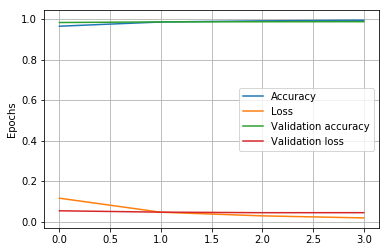

In [78]:
'''Train Mnist using a CNN'''

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

'''
Reference: https://keras.io/examples/mnist_cnn/
'''

batch_size = 16
epochs = 12
learning_rate = 0.001

# Get data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
rows, cols = x_train.shape[1], x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_shape = (rows, cols, 1)
print('Train data shape:', x_train.shape)
print('Test data shape:', x_test.shape)
print('Train label shape:', y_train.shape)
print('Test label shape:', y_test.shape)
print('Input shape:', input_shape)

# Define model
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                        input_shape=input_shape, name='first'))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu',
                        name='second'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(10, activation='softmax', name='output'))
print(model.summary())

# Define callbacks
model_checkpoint = callbacks.ModelCheckpoint('./trial_mnist.ckpt', monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss')
csv_logger = callbacks.CSVLogger('./trial_mnist.csv')
tensorboard = callbacks.TensorBoard('./logs', write_images=True)

# Model compile
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer=Adam(learning_rate=learning_rate))

# Fit
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, y_test),
                   callbacks=[model_checkpoint, early_stopping, reduce_lr, csv_logger, tensorboard])

# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.grid()
plt.ylabel('Metric')
plt.ylabel('Epochs')
plt.show()

In [86]:
'''Reverse string'''
input_string = input('Enter a string: ')
input_string = input_string.lower()
if input_string[::-1] == input_string:
    print('Palindrome')
else:
    print('Not a palindrome')

Enter a string: deepan
Not a palindrome


In [87]:
'''Args: Pass unknown number of arguments'''

def printer_args(*args):
    for i in args:
        print(i)
        
printer_args(1,2,39)

1
2
39


In [93]:
'''kwargs: Pass unknown number of keyword arguments'''
def printer_kwargs(**kwargs):
    for n in kwargs:
        print(n , kwargs[n])

printer_kwargs(a=1, b=2, c=10)

c 10
b 2
a 1


In [94]:
'''Closure in python'''
def A(x):
    def B():
        print(x)
    return B
A(7)()

7


In [109]:
'''Read file'''
lines = open('trial_mnist.csv').read().splitlines()
print(lines)
len(lines)

['epoch,accuracy,loss,lr,val_accuracy,val_loss', '0,0.96486664,0.11532304746963394,0.001,0.9831,0.0530750660309277', '1,0.9856667,0.04597918609338376,0.001,0.9861,0.04635525720071164', '2,0.9914167,0.028024158067810397,0.001,0.9869,0.04368171086247603', '3,0.9943333,0.01788586653930791,0.001,0.9872,0.04378830693755099']


5

In [116]:
import re
re.split(r'A', 'HAHHAHAHA')
re.sub(r'A', 'J','HAJA')
re.subn(r'A', 'J', 'HAJA')

('HJJJ', 2)